In [16]:
import numpy as np
from qiskit import *
%matplotlib inline

n = 3 # number of qubits. We may want this to not to be fixed later

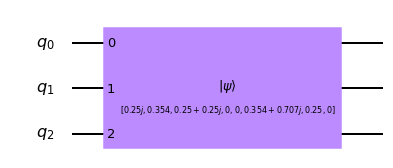

In [17]:
import math
desired_initial_state = [
    1 / math.sqrt(16) * complex(0, 1),
    1 / math.sqrt(8) * complex(1, 0),
    1 / math.sqrt(16) * complex(1, 1),
    0,
    0,
    1 / math.sqrt(8) * complex(1, 2),
    1 / math.sqrt(16) * complex(1, 0),
    0]


qc_init = QuantumCircuit(3)

qc_init.initialize(desired_initial_state, [0,1,2])
qc_init.draw('mpl')

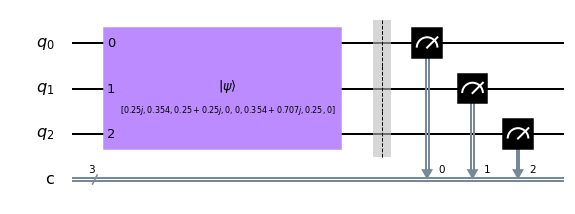

In [18]:
# Create a Quantum Circuit
meas = QuantumCircuit(n, n)
meas.barrier(range(n))
# map the quantum measurement to the classical bits
meas.measure(range(n), range(n))

# The Qiskit circuit object supports composition using
# the addition operator.
qc = qc_init + meas

#drawing the circuit
qc.draw('mpl')

In [19]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

{'000': 55, '001': 107, '010': 126, '101': 668, '110': 68}


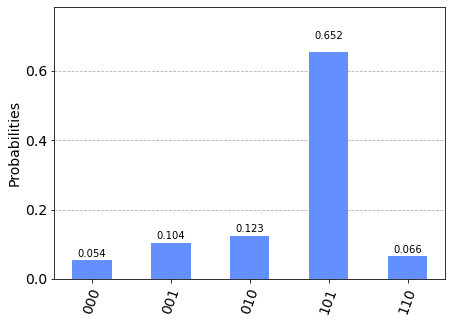

In [20]:
counts = result_sim.get_counts(qc)
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [29]:
counts.values()

dict_values([55, 107, 126, 668, 68])